In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import itertools

# TASK 1

In [2]:
# Polynomial target function without noise
def target_func(x):
    """Polynomial target function without noise"""
    return 0.5 + 0.4*np.sin(2*np.pi*x)

# Noisy Polynomial target function
def noisy_target_func(x):
    """Polynomial target function with Gaussian noise"""
    mu = 0
    std = 0.05
    noise = np.random.normal(mu, std,x.shape)
    return target_func(x) + noise

def plot_without_Regularization(x, y, trainX, trainY, markerSize):
    # Turning to 2d arrays, because we need 2d arrays to apply fit_transform function
    trainX_2d = trainX.reshape((trainX.shape[0], 1))
    trainY_2d = trainY.reshape((trainY.shape[0], 1))
    
    degrees = [0, 1, 3, 9]
    titles = ["0 Order Polynomial", "1st Order Polynomial", "3rd Order Polynomial", "9th Order Polynomial (over-fitting)"]
    
    coefs = []
    intercepts = []
    fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(14, 8))
    
    for degree, ax, title in zip(degrees, axs.flatten(), titles):
        poly = PolynomialFeatures(degree=degree)
        trainX_p = poly.fit_transform(trainX_2d)
        clf = LinearRegression()
        trainY_2d_ = clf.fit(trainX_p, trainY_2d)
        coefs.append(clf.coef_[0])
        intercepts.append(clf.intercept_[0])
        if degree == 0:
            fitLine = clf.intercept_[0]
        elif degree == 1:
            fitLine = clf.intercept_[0]+ clf.coef_[0][1]*x
        elif degree == 3:
            fitLine = clf.intercept_[0]+ clf.coef_[0][1]*x+ clf.coef_[0][2]*np.power(x, 2)+ clf.coef_[0][3]*np.power(x, 3)
        elif degree == 9:
            fitLine = clf.intercept_[0]+ clf.coef_[0][1]*x+ clf.coef_[0][2]*np.power(x, 2)+ clf.coef_[0][3]*np.power(x, 3)+ clf.coef_[0][4]*np.power(x,4)+ clf.coef_[0][5]*np.power(x, 5)+ clf.coef_[0][6]*np.power(x, 6)+ clf.coef_[0][7]*np.power(x,7)+ clf.coef_[0][8]*np.power(x, 8)+ clf.coef_[0][9]*np.power(x, 9)

        ax.plot(x, y, 'g-',label='actual function')
        ax.plot(trainX, trainY, linestyle='none', marker='o', markersize=markerSize, color='b', fillstyle='none', label='training set')

        if degree == 0:
            ax.axhline(y=fitLine, color='r', label='fit line')
        else:
            ax.plot(x, fitLine, color='r', label='fit line')

        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_title(title)
        ax.legend(loc='upper right')
        plt.tight_layout()
    
    plt.show()
    
    for i, intercept in enumerate(intercepts):
        coefs[i][0] = intercept
    
    return coefs

def plot_with_Regularization(x, y, trainX, trainY, markerSize):
    """
    We used ridge regression from scikit learn library (lambda == alpha)
    """
    # Turning to 2d arrays, because we need 2d arrays to apply fit_transform function
    trainX_2d = trainX.reshape((trainX.shape[0], 1))
    trainY_2d = trainY.reshape((trainY.shape[0], 1))
    degree = 9
    titles = ["M=9 L=0", "M=9 L=1", "M=9 L=%s"%str(np.exp(-18))]
    
    alphas = [0, 1, np.exp(-18)]
    coefs = []
    intercepts = []
    
    fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(20, 6))
    
    for alpha, ax, title in zip(alphas, axs.flatten(), titles):
        poly = PolynomialFeatures(degree=degree)
        trainX_p = poly.fit_transform(trainX_2d)
        clf = Ridge(alpha=alpha)
        clf.fit(trainX_p, trainY_2d)
        coefs.append(clf.coef_[0])
        intercepts.append(clf.intercept_[0])
        fitLine = clf.intercept_[0]+ clf.coef_[0][1]*x+ clf.coef_[0][2]*np.power(x, 2)+ clf.coef_[0][3]*np.power(x, 3)+ clf.coef_[0][4]*np.power(x,4)+ clf.coef_[0][5]*np.power(x, 5)+ clf.coef_[0][6]*np.power(x, 6)+ clf.coef_[0][7]*np.power(x,7)+ clf.coef_[0][8]*np.power(x, 8)+ clf.coef_[0][9]*np.power(x, 9)
        ax.plot(x, y, 'g-',label='actual function')
        ax.plot(trainX, trainY, linestyle='none', marker='o', markersize=markerSize, color='b', fillstyle='none', label='training set')  
        ax.plot(x, fitLine, color='r', label='fit line')
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_title(title)
        ax.legend(loc='upper right')
        plt.tight_layout()
    plt.show()
    
    for i, intercept in enumerate(intercepts):
        coefs[i][0] = intercept
    
    return coefs

def plot_Error_vs_Lambda(x, y, trainX, trainY, testX, testY, markerSize):
    """
    We used ridge regression from scikit learn library (lambda == alpha)
    """
    # Turning to 2d arrays, because we need 2d arrays to apply fit_transform function
    trainX_2d = trainX.reshape((trainX.shape[0], 1))
    trainY_2d = trainY.reshape((trainY.shape[0], 1))
    testX_2d = testX.reshape((testX.shape[0], 1))
    testY_2d = testY.reshape((testY.shape[0], 1))
    degree = 9
    
    alphas = np.logspace(-30, 30, 400)
    
    train_Errors = []
    test_Errors = []
   
    for alpha in alphas:
        poly = PolynomialFeatures(degree=degree)
        trainX_p = poly.fit_transform(trainX_2d)
        clf = Ridge(alpha=alpha)
        clf.fit(trainX_p, trainY_2d)
        trainY_ = clf.predict(trainX_p)
        train_Errors.append(np.mean((trainY_ - trainY_2d) ** 2))
        
        testX_p = poly.fit_transform(testX_2d)
        testY_ = clf.predict(testX_p)
        test_Errors.append(np.mean((testY_ - testY_2d) ** 2))
       
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(alphas, train_Errors, label="Training")
    ax.plot(alphas, test_Errors, label="Test")
    ax.set_xscale('log')
    ax.set_xlabel('Lambda')
    ax.set_ylabel('MSE')
    ax.legend(loc='best')
    plt.axis('tight')
    plt.show()

## For 9 points

In [3]:
x = np.linspace(0.0, 1.0, num=999)
y = target_func(x) 
trainX9 = np.linspace(0.0, 1.0, num=9)
trainY9 = noisy_target_func(trainX9)
testX9 = np.linspace(0.0, 1.0, num=9)
testY9 = noisy_target_func(testX9)

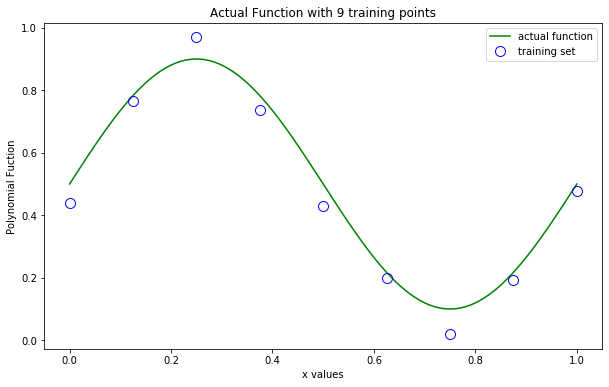

In [4]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x, y, 'g-',label='actual function')
ax.plot(trainX9, trainY9, linestyle='none', marker='o', markersize=10, color='b', fillstyle='none', label='training set')
ax.set_xlabel('x values')
ax.set_ylabel('Polynomial Fuction')
ax.set_title("Actual Function with 9 training points")
ax.legend(loc='upper right')

plt.show()

#### Plotting without Regularization

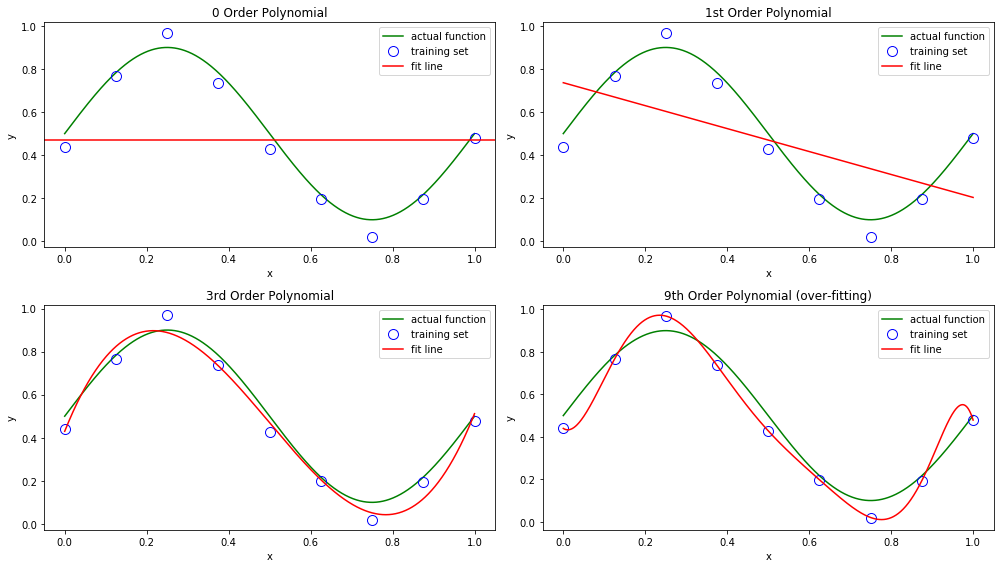

In [5]:
coefs = plot_without_Regularization(x, y, trainX9, trainY9, markerSize=10)

#### Polynomial Coefficients

In [6]:
cols = ["w0*", "w1*", "w2*", "w3*", "w4*", "w5*", "w6*", "w7*", "w8*" ,"w9*"]
ix = ["M=0","M=1","M=3","M=9"]
table = pd.DataFrame(coefs,index=ix, columns=cols)
table.T.fillna("")

,M=0,M=1,M=3,M=9
w0*,0.470026,0.736351,0.429734,0.439633
w1*,,-0.532651,4.76088,-1.245594
w2*,,,-14.0469,62.070122
w3*,,,9.36812,-315.124866
w4*,,,,554.602428
w5*,,,,-213.901926
w6*,,,,-346.834429
w7*,,,,129.545217
w8*,,,,336.814233
w9*,,,,-205.885891


#### Regularization

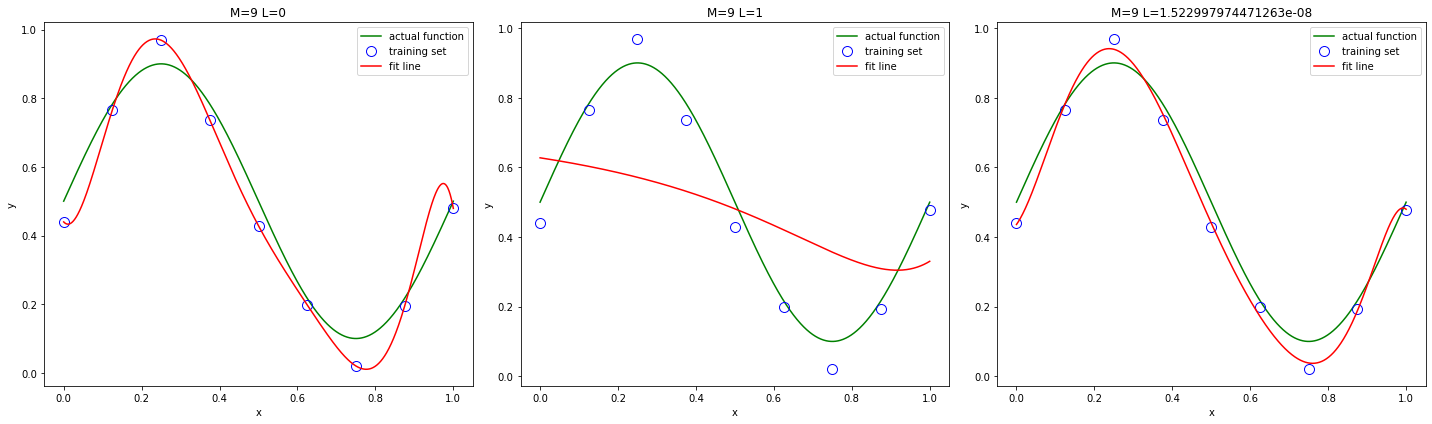

In [7]:
coefs2 = plot_with_Regularization(x, y, trainX9, trainY9, markerSize=10)

In [8]:
cols = ["w0*", "w1*", "w2*", "w3*", "w4*", "w5*", "w6*", "w7*", "w8*" ,"w9*"]
ix = ["L=0","L=1","L=1.52e-08"]
table = pd.DataFrame(coefs2,index=ix, columns=cols)
table.T.fillna("")

,L=0,L=1,L=1.52e-08
w0*,0.439633,0.627435,0.435895
w1*,-1.245594,-0.172995,1.577217
w2*,62.070118,-0.172461,23.228278
w3*,-315.124841,-0.113844,-135.021085
w4*,554.602354,-0.056751,216.759932
w5*,-213.901822,-0.011057,-45.693785
w6*,-346.834464,0.023818,-158.956711
w7*,129.545144,0.050200,22.533691
w8*,336.814319,0.070239,167.008200
w9*,-205.885919,0.085593,-91.391925


#### ERROR vs LAMBDA

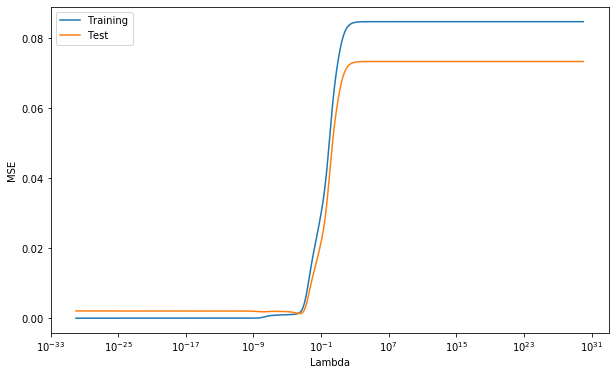

In [9]:
plot_Error_vs_Lambda(x, y, trainX9, trainY9, testX9, testY9, markerSize=10)

## For 15 Points

In [16]:
x = np.linspace(0.0, 1.0, num=999999)
y = target_func(x) 
trainX15 = np.linspace(0.0, 1.0, num=15)
trainY15 = noisy_target_func(trainX15)
testX15 = np.linspace(0.0, 1.0, num=15)
testY15 = noisy_target_func(testX15)

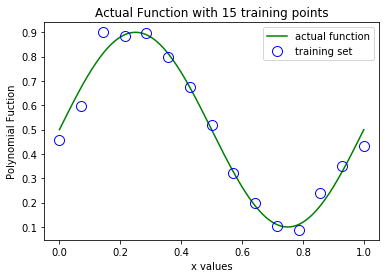

In [11]:
fig, ax = plt.subplots()
ax.plot(x, y, 'g-',label='actual function')
ax.plot(trainX15, trainY15, linestyle='none', marker='o', markersize=10, color='b', fillstyle='none', label='training set')
ax.set_xlabel('x values')
ax.set_ylabel('Polynomial Fuction')
ax.set_title("Actual Function with 15 training points")
ax.legend(loc='upper right')

plt.show()

#### Plotting without Regularization

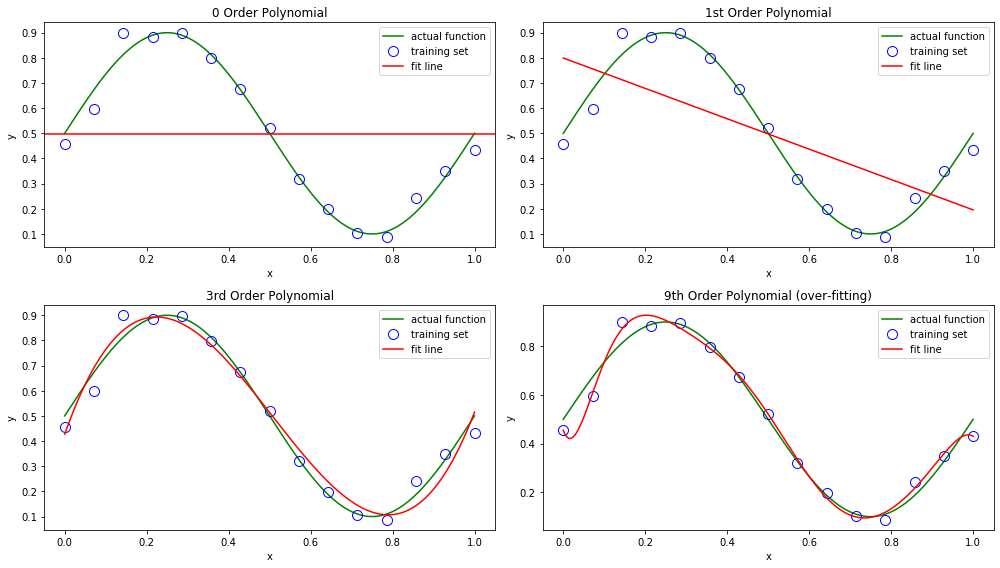

In [13]:
coefs15 = plot_without_Regularization(x, y, trainX15, trainY15, markerSize=10)

#### Polynomial Coefficients

In [14]:
cols = ["w0*", "w1*", "w2*", "w3*", "w4*", "w5*", "w6*", "w7*", "w8*" ,"w9*"]
ix = ["M=0","M=1","M=3","M=9"]
table = pd.DataFrame(coefs15,index=ix, columns=cols)
table.T.fillna("")

,M=0,M=1,M=3,M=9
w0*,0.497416,0.799239,0.427056,0.454868
w1*,,-0.603646,4.60222,-4.498990
w2*,,,-13.2011,171.813673
w3*,,,8.68663,-1485.551429
w4*,,,,6331.918463
w5*,,,,-15585.929251
w6*,,,,23063.340258
w7*,,,,-20234.756216
w8*,,,,9711.022523
w9*,,,,-1967.383482


#### Regularization

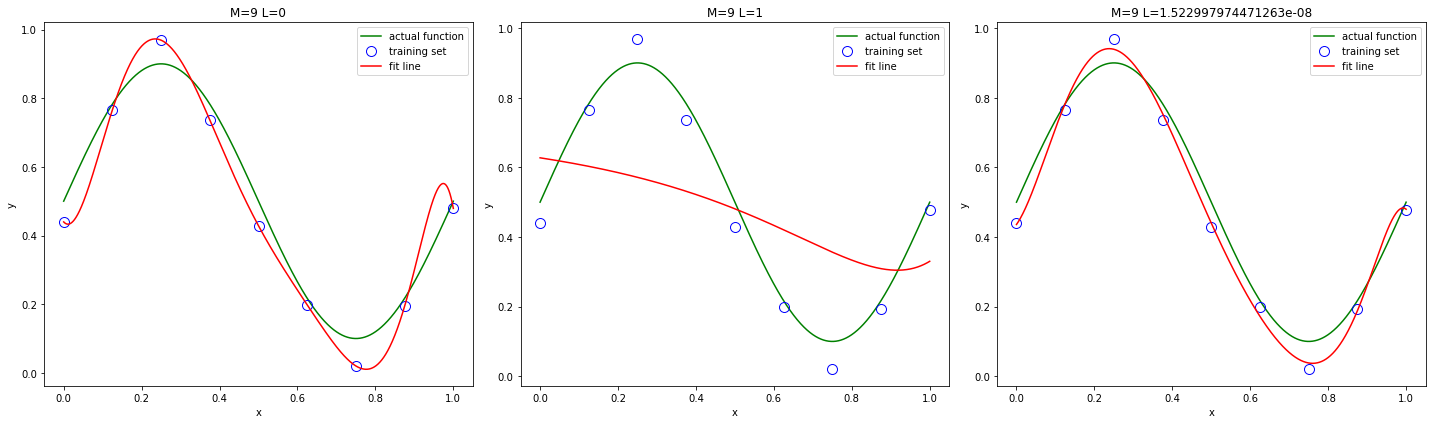

In [22]:
coefs15_2 = plot_with_Regularization(x, y, trainX9, trainY9, markerSize=10)

#### Error vs Lambda

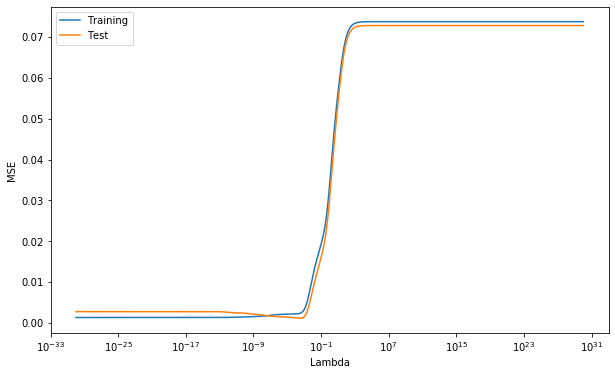

In [17]:
plot_Error_vs_Lambda(x, y, trainX15, trainY15, testX15, testY15, markerSize=10)

## For 100 Points

In [18]:
x = np.linspace(0.0, 1.0, num=999999)
y = target_func(x) 
trainX100 = np.linspace(0.0, 1.0, num=100)
trainY100 = noisy_target_func(trainX100)
testX100 = np.linspace(0.0, 1.0, num=100)
testY100 = noisy_target_func(testX100)

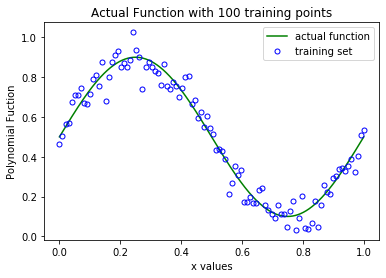

In [19]:
fig, ax = plt.subplots()
ax.plot(x, y, 'g-',label='actual function')
ax.plot(trainX100, trainY100, linestyle='none', marker='o', markersize=5, color='b', fillstyle='none', label='training set')
ax.set_xlabel('x values')
ax.set_ylabel('Polynomial Fuction')
ax.set_title("Actual Function with 100 training points")
ax.legend(loc='upper right')

plt.show()

#### Plotting without Regularization

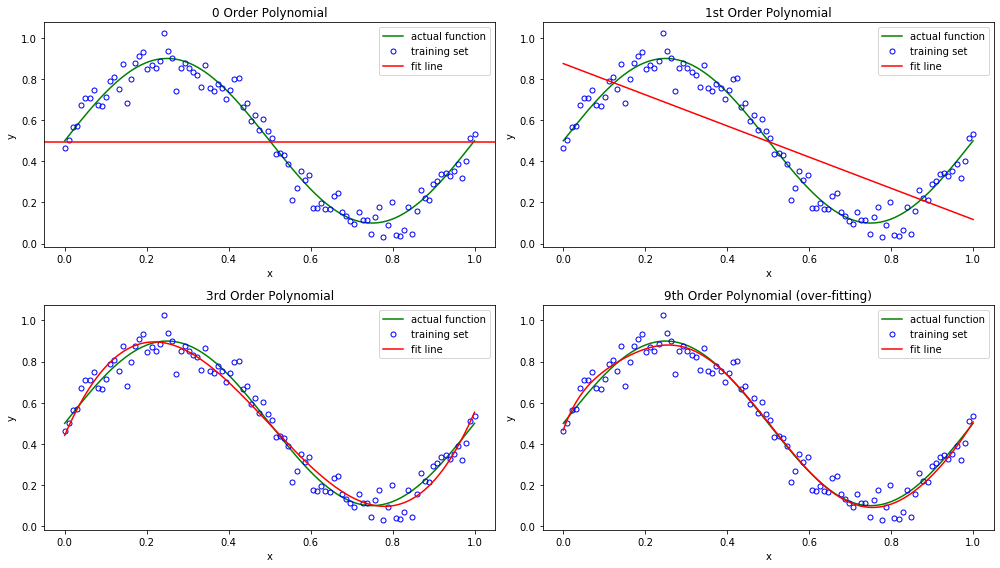

In [25]:
coefs100 = plot_without_Regularization(x, y, trainX100, trainY100, markerSize=5)

#### Polynomial Coefficients

In [23]:
cols = ["w0*", "w1*", "w2*", "w3*", "w4*", "w5*", "w6*", "w7*", "w8*" ,"w9*"]
ix = ["M=0","M=1","M=3","M=9"]
table = pd.DataFrame(coefs100,index=ix, columns=cols)
table.T.fillna("")

,M=0,M=1,M=3,M=9
w0*,0.497462,0.803808,0.491083,0.512767
w1*,,-0.612693,4.05687,7.625004
w2*,,,-12.2306,-130.961047
w3*,,,8.21486,1214.072308
w4*,,,,-5816.151800
w5*,,,,15491.247644
w6*,,,,-24059.545832
w7*,,,,21661.024223
w8*,,,,-10452.947912
w9*,,,,2085.577736


#### Regularization

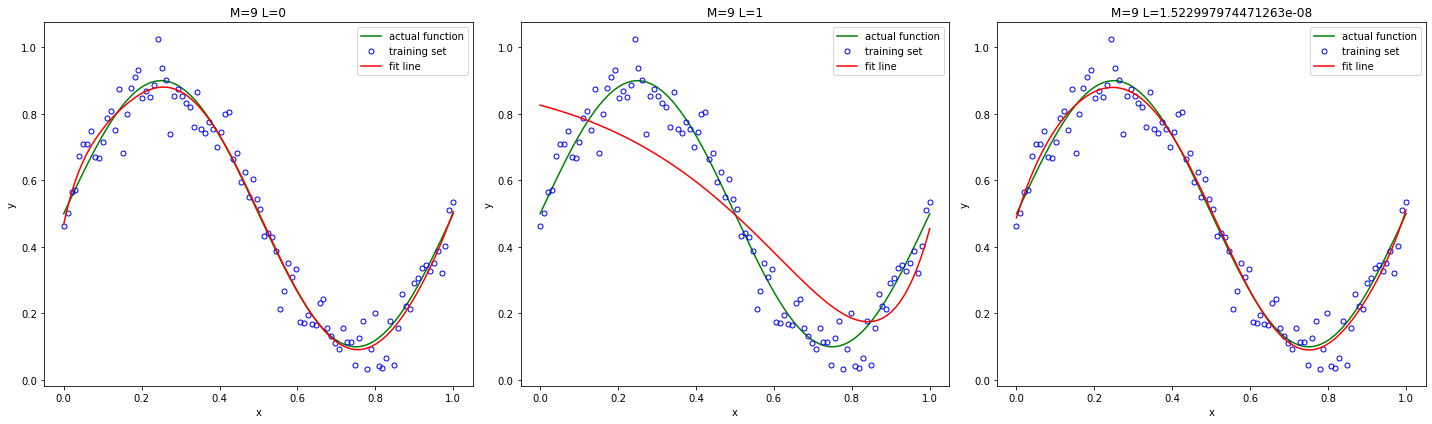

In [24]:
coefs100_2 = plot_with_Regularization(x, y, trainX100, trainY100, markerSize=5)

#### Error vs Lambda

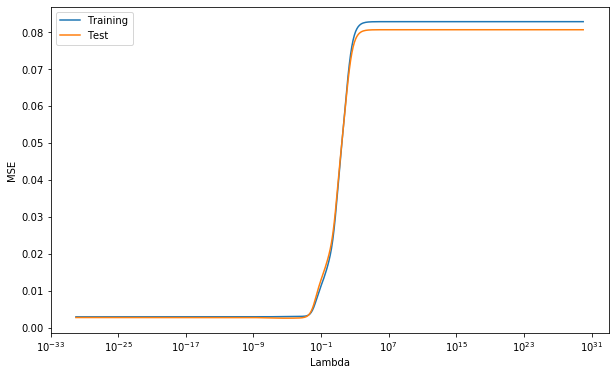

In [27]:
plot_Error_vs_Lambda(x, y, trainX100, trainY100, testX100, testY100, markerSize=5)

# TASK 2

#### a) The number of vertices ("corners") of $U_n$

For n-dimensional cube (hypercube); number of vertices' formula: $2^n$

In [2]:
def Corners(n):
    return np.power(2, n)

#### b) The length of the longest diagonal of $U_n$

For n-dimensional cube; the number of vertices' formula: $R\sqrt n$

In [3]:
def Diag(n):
    """R is equal to 1, because it is a unit cube"""
    return np.sqrt(n)

#### c) The volume of $B_n$

We will generate uniformly distributed number inside n-dimensional cube. We assume that $B_n$ is placed in $U_n$. Then we will check the points we generated how many of them are in the $B_n$

In [2]:
def VolumeB(n):
    """The number of dimension shows us the number of coordinates. 
    For example: for 3 dimension coorsinates have 3 values like (x,y,z)"""
    # low and high values are default [0,1]
    
    p_size = 10**6 # This represents the number of points
    points = np.random.uniform(size=(p_size, n))
    
    Bpoints = []
    
    for point in points:
        res = 0
        for v in point:
            res = res + (v - 0.5)**2
        
        if res < 0.25:
            Bpoints.append(point)
    
            
            
    return len(Bpoints)/p_size

In [38]:
estimated_volume = VolumeB(3)
actual_volume = 4/3*np.pi*(0.5)**3

In [39]:
estimated_volume

0.524105

In [40]:
actual_volume

0.5235987755982988

#### d) The volume of the "0.01-skin" of $U_n$

For n-dimensional cube; volume formula: $r^n$

In [5]:
def VolumeS(n):
    """r == 1, because it is unit n-cube"""
    return 1**n-(1-2*0.01)**n

#### e) Produce a histogram of distances between pairs.

In [14]:
def plot_distances(n):
    distances = []
    points = np.random.uniform(size=(1000, n))
    for (p1, p2) in itertools.product(points, repeat=2):
        if np.array_equal(p1, p2):
            pass
        else:
            d = 0
            for x, y in zip(p1,p2):
                d = d + (x-y)**2
            distances.append(np.sqrt(d))
    plt.hist(distances, normed=True)
    plt.show()

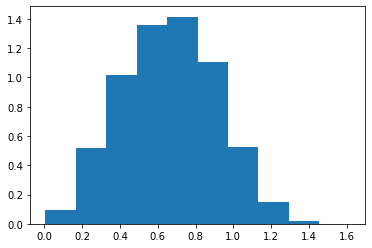

In [15]:
plot_distances(3)